# Simple Linear Regression
Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable.

When the regression relationship for the variables is known, we can predict the approximate value of one variable from the value of the other.

It uses Ordinary Least Squares

## Loss function  
The loss is the error in our predicted of **m** and **c**. Our goal is to minimize this error to obtain the most accurance value of **m** and **c**.  
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
### $E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2 $

Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$
### $E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2 $
So we square the error and find the mean, hence the name Mean Squared Error.  

## Methods used in this notebook 
1. Least Squares
2. Sci-kit Learn
3. Stats Model
4. Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

We will read the dataset using pandas and get the x and y values

In [2]:
data = pd.read_csv("datasets/student-scores.csv")

## Step 1 - Exploring the dataset
This is done so we can understand our dataset better 

In [3]:
# Seeing the dimensions
data.shape

(25, 2)

In [4]:
# Seeing the first 5 elements in the dataset
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Seeing the statistical details of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2 - Visualizing the dataset
We will plot a graph using the seaborn library to check if the data has a linear relationship or not.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

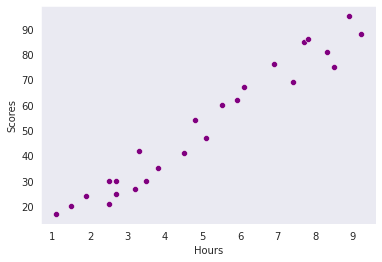

In [6]:
sb.set_style("dark")
sb.scatterplot(x="Hours", y="Scores", data=data, color="purple")

In [7]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

In [8]:
# Getting the train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3(I) - Linear regression using Least Squares

The equation for linear regression is given by 

$ y = b_0 + b_1 * x $

We can calculate $b_0$ and $b_1$ using

$ b_0 = \bar y - b_1 * \bar x$ 

$ b_1 = \frac{\sum \limits _{i=1} ^{n} (x_i - \bar x)*(y_i - \bar y)} {\sum \limits _{i=1} ^{n} (x_i = \bar x)^2} $  

In [9]:
def estimate_coef(x,y):
    n = np.size(x) 
    mean_x, mean_y = np.mean(x), np.mean(y) 

    ss_xy = np.sum(y*x - n*mean_y*mean_x) 
    ss_xx = np.sum(x*x - n*mean_x*mean_x) 
 
    b1 = ss_xy / ss_xx 
    b0 = mean_y - (b1*mean_x) 

    return(b0, b1) 

In [10]:
b = estimate_coef(X_train, y_train) 
print("Estimated coefficients:\nb0 = {} \nb1 = {}".format(b[0], b[1])) 

Estimated coefficients:
b0 = -0.024187416103465864 
b1 = 10.300417445821273


### Visualizing actual and estimated values
Plotting a graph to compare the actual y values and the y values estimated using the coefficients.

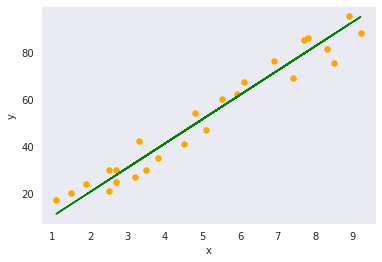

In [11]:
plt.scatter(X,y,color = 'orange',marker = 'o', s = 30)
y_estimate = b[0] + b[1]*X_train
plt.plot(X_train,y_estimate,color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Predicting values
Making predictions using the test data.

In [12]:
y_pred = b[0] + b[1]*X_test

Comparing actual and predicted values

In [13]:
predictions1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [14]:
predictions1

,Actual,Predicted
0,20,15.426439
1,27,32.937148
2,69,76.198902
3,30,25.726856
4,62,60.748276


### Evaluating the algorithms (Calculating Residuals and RMSE)
When working with linear regression, our main goal is to find the best fit line that means the error between predicted values and actual values should be minimized. The best fit line will have the least error. Hence these three evaluation metrics are commonly used.

1. Mean Absolute Error (MAE aka Residuals) is the mean of the absolute value of the errors. = $ \frac{1}{n} \sum \limits _{i=1} ^{n} |Actual - Predicted| $

2. Mean Squared Error (MSE) is the mean of the squared errors. = $ \frac{1}{n} \sum \limits _{i=1} ^{n} {|Actual - Predicted|}^2 $ 

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors. It represents the standard deviation of the residuals = $ \sqrt {\frac{1}{n} \sum \limits _{i=1} ^{n} {|Actual - Predicted|}^2} $

**NOTE :** 

**1. MSE is the cost function in Linear Regression. Cost function optimizes the regression coefficients or weights. It measures how a linear regression model is performing.** 

**2. Residuals is the distance between the actual value and predicted values. If the observed points are far from the regression line, then the residual will be high, and so cost function will high. If the scatter points are close to the regression line, then the residual will be small and hence the cost function.** 

**3. Gradient descent is used to minimize the MSE by calculating the gradient of the cost function. A regression model uses gradient descent to update the coefficients of the line by reducing the cost function. It is done by a random selection of values of coefficient and then iteratively update the values to reach the minimum cost function.**

In [15]:
def MAE(actual,predicted):
    error = []
    n = len(actual)
    for i in range(n):
        error.append(actual[i] - predicted[i])
    MAE = (1/n) * sum(error)
    return MAE
    

In [16]:
def MSE(actual,predicted):
    error = []
    n = len(actual)
    for i in range(n):
        error.append((actual[i] - predicted[i])**2)
    MSE = (1/n) * sum(error)
    return MSE

In [17]:
def RMSE(actual,predicted):
    error = []
    n = len(actual)
    for i in range(n):
        error.append(((actual[i] - predicted[i])**2))
    RMSE = ((1/n) * sum(error))**0.5
    return RMSE

In [18]:
print('Mean Absolute Error:', MAE(y_test, y_pred))
print('Mean Squared Error:', MSE(y_test, y_pred))
print('Root Mean Squared Error:', RMSE(y_test, y_pred))

Mean Absolute Error: -0.6075241117637561
Mean Squared Error: 25.56359026203056
Root Mean Squared Error: 5.056044922865159


### Calculating $R^2$ score (Coefficient of determination)
R-squared is a statistical method that determines the goodness of fit. It measures the strength of the relationship between the dependent and independent variables. The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model. on a scale of 0-100%.

$R^2 = \frac{Explained Variation}{Total Variation}$ = $1 - \frac {\sum\limits _{i=1} ^{n}{(Actual - Predicted)}^2}{{\sum\limits _{i=1}^{n}(Actual} - Mean)}$


In [19]:
def mean(y):
    return (sum(y)/len(y))

In [20]:
def r_squared(actual,predicted):
    m = mean(actual)
    error1 = []
    error2 = []
    for i in range(len(actual)):
        error1.append((actual[i] - predicted[i])**2)
        error2.append((actual[i] - m)**2)
    r2 = 1 - (sum(error1) / sum(error2))
    return r2

In [21]:
print('R-squared Score:',r_squared(y_test, y_pred))

R-squared Score: 0.9354845793912009


## Step - 3(II) - Linear regression using Sci-kit Learn

In [22]:
X_train2 = X_train.reshape(-1, 1)
X_test2 = X_test.reshape(-1, 1)

In [23]:
model = LinearRegression()
model.fit(X_train2,y_train)

LinearRegression()

### Cheking model performance
Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. We will see the value of the intercept and slop calculated by the linear regression algorithm for our dataset.

In [24]:
print(model.intercept_)

2.018160041434683


For retrieving the slope (coefficient of x).

In [25]:
print(model.coef_)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

### Making predictions

In [26]:
y_pred = model.predict(X_test2)

In [27]:
predictions2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [28]:
predictions2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the algorithm by calculating RMSE

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### Calculating the $R^2$ score

In [30]:
print('R-squared Score:',metrics.r2_score(y_test, y_pred))

R-squared Score: 0.9454906892105356


## Step 3(III) - Linear Regression using Statsmodels

In [31]:
import statsmodels.api as sm
from termcolor import colored as cl

In [32]:
# Storing the Ordinary Least Squares (OLS) model
slr_model = sm.OLS(y_train, X_train)

In [33]:
# Fitting the model
slr_reg = slr_model.fit()

### Evaluating the model and checking $R^2$

In [34]:
print(cl(slr_reg.summary(),attrs = ['bold']))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):                    6.12e-21
Time:                        11:20:15   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Step 3(IV) - Linear Regression using Gradient Descent
Let's try applying gradient descent to **m** and **c** and approach it step by step: 
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  
\\[ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) \\]
3. Now we update the current value of **m** and **c** using the following equation: 
\\[ m = m - L \times D_m\\]  
\\[ c = c - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **m** and **c** that we are left with now will be the optimum values.  

In [35]:
X = X_train
Y = y_train

### Build the model

In [36]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred4 = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred4))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred4)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

9.969469218090014 1.577836172679518


### Making Predictions

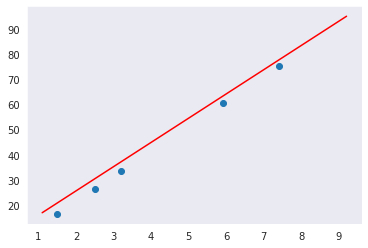

In [37]:
Y_pred4 = m*X_test + c

plt.scatter(X_test, Y_pred4)
plt.plot([min(X), max(X)], [min(Y), max(Y)], color='red') 
plt.show()

In [38]:
predictions4 = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred4})

In [39]:
predictions4

,Actual,Predicted
0,20,16.532040
1,27,33.480138
2,69,75.351908
3,30,26.501509
4,62,60.397705


### Evaluating the algorithm by calculating RMSE

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred4)))

Mean Absolute Error: 4.2801584559966965
Mean Squared Error: 21.834491874960815
Root Mean Squared Error: 4.672739226081508


### Evaluating the model and checking $R^2$

In [41]:
print('R-squared Score:',metrics.r2_score(y_test, Y_pred4))

R-squared Score: 0.9448957907456067
